# Stellar Atmosphere Modeling


## Assignmen Outline

For this assignment, you will plot the following stellar atmosphere models on a single figure.

The figures must include:

- 3 models on a single plot, in different colors or line styles.
    - <u>*Figure 1*</u>: **Three stars** with *different* temperatures, *same* $\log(g)$ and *same* metallicity ($z$)
    - <u>*Figure 2*</u>: **Three stars** with the *same* temperature, *different* $\log(g)$ and *same* metallicity ($z$)
- The spectra should be plotted in the range $3800\space Å \le \lambda \le 7000\space Å$
- Properly labeled axes and title
- A legend labeling each line with its corresponding model ($T_\text{eff}$ & $\log(g)$)

Here is a [Jupyter Notebook](https://drive.google.com/file/d/1WElFea3qzLzBEC06YJqGA7kACLebPReh/view?usp=sharing) and the [first file](https://erau.instructure.com/courses/163207/files/35554447?wrap=1) to get you started.

You will download the remaining files from the [SVO website](http://svo2.cab.inta-csic.es/theory/newov2/index.php).

## Assignment Deliverables

First save to your own Drive.

1. **Save a copy** to your Google Drive
2. Create a **public viewing link** for your Juypter Notebook
3. Submit that public link to [Canvas](https://erau.instructure.com/courses/163207/assignments/3282014)

# Assignment Checklist

- [x]  Edit the code to plot *only* the spectrum over the visible range $3800\text{ Å}\le\lambda\le7000\text{ Å}$.
- [x]  Find two other model’s data to use
- [x]  Read the three models with different temperatures into their own arrays.
- [x]  3 models on a single plot, in different colors or line styles.
    - [x]  **Figure 1**: 3 stars with different $T_\text{eff}$, same $\log(g)$ and same metallicities.
    - [x]  **Figure 2**: 3 stars with the same $T_\text{eff}$, different $\log(g)$ and same metallicities.
- [x]  Plot all three models on the same figure. This figure should have:
    - [x]  All three models
        - [x]  In different colors and/or line styles.
    - [x]  Properly labeled axes.
    - [x]  Properly labeled title.
    - [x]  A legend labeling each line with its corresponding model; $T_{\text{eff}}$ and $\log(g)$.
        - [x]  $T_{\text{eff}}$
        - [x]  $\log(g)$.
- [ ]  Provide a brief description of how the spectra change over this temperature range and why, based on what we have been discussing in class in terms of flux, opacity, optical depth, line broadening, etc.
- [x]  Properly comment your code.
- [x]  Note the additional information at the top of the file
- [x]  Make sure to give credit to the model source that you used (e.g. Coelho 2014, MNRAS, 440, 1027)
- [x]  Repeat steps (1) through (5) for stars with the ****same**** temperature, but *different* values of gravity.
- [x] Create public access link for Google Colab. Notebook
- [x] Submit link and figures to [Canvas](https://erau.instructure.com/courses/163207/assignments/3282014)

# Code

## Imports & Functions

In [44]:
"""
NAME:
------
   - Krystian Ojeda Confeiteiro
   - Date: 11/01/2023

PURPOSE:
--------
    The purpose of this program is to read files from a given directory then plot them into
    an appropriately labeled plot figure.

CALLING SEQUENCE:
-----------------
1. `CONFIG`
2. `prepare_data()`
3. `axes.plot()`
4. `plt.savefig()`

INPUT PARAMETERS:
-----------------
    - CONFIG:
        - A configuration dictonary with the following keys:
                - model 1: String list of your filenames for model 2
                - model 2: String list of your filenames for model 2
                - range: Tuple of your x-axis range
                - read_kwargs: Nested dictionary of keyword arguments for reading your data
                - plot configs: Nested dictionary of titles for your figure
                    - title: Plot title
                    - xlabel: Plot x-axis label
                    - ylabel: Plot y-axis label

OUTPUT PARAMETERS:
------------------
    - FIGURE(s): Figures from your data that you saved to `CONFIG["figure save path"]`
    - DATA: Data that was read from `prepare_data()`

EXAMPLES:
---------
    >>> from . import prepare_data
    >>> file1pth, file2pth, file3pth = "path/to/file1/file1.txt", "path/to/file2/file2.txt", "path/to/file3/file3.txt"
    >>> file1, file2, file3 = prepare_data(file1pth, file2pth, file3pth, colnames=["Wavelength", "Flux"])
    >>>     Wavelength        Flux
    >>> 373      3810.0  10717600.0
    >>> 374      3830.0   8631530.0
    >>> 375      3850.0  10152000.0
    >>> 376      3870.0  11055000.0
    >>> 377      3890.0   8590640.0
    >>> ..          ...         ...
    >>> 528      6910.0   8038280.0
    >>> 529      6930.0   7981760.0
    >>> 530      6950.0   7924950.0
    >>> 531      6970.0   7900490.0
    >>> 532      6990.0   7859210.0

PROCEDURE (PSEUDOCODE):
-----------------------
In order, we have:
    1. Set up run configuration (see `CONFIG` variable)
    2. Call `prepare_data()` to read data
        - def prepare_data(*filenames, drange, colnames, astype, dropna, **kwargs)
    3. Plot data on their respective axis
    4. Set proper axes lables and figure title(s)
    5. Configure plot legened with `label` in `axes.plot()` lines
    6. Save plot with `fig.savefig()` to appropriate directory (or directories)

NOTES:
------
- Data was retrieved from:
    - Model 1:
        - Star 1: http://svo2.cab.inta-csic.es/theory/newov2/ssap.php?model=Kurucz2003all&fid=23182&format=ascii
        - Star 2: http://svo2.cab.inta-csic.es/theory/newov2/ssap.php?model=Kurucz2003all&fid=23075&format=ascii
        - Star 3: http://svo2.cab.inta-csic.es/theory/newov2/ssap.php?model=Kurucz2003all&fid=23122&format=ascii
    - Model 2:
        - Star 1: http://svo2.cab.inta-csic.es/theory/newov2/ssap.php?model=Kurucz2003all&fid=16601&format=ascii
        - Star 2: http://svo2.cab.inta-csic.es/theory/newov2/ssap.php?model=Kurucz2003all&fid=16602&format=ascii
        - Star 3: http://svo2.cab.inta-csic.es/theory/newov2/ssap.php?model=Kurucz2003all&fid=16603&format=ascii
- All the above data was sourced from: Kurucz ODFNEW /NOVER (2003) (from http://svo2.cab.inta-csic.es/theory/newov2/index.php)
- Additional sources:
    - [Spectral Line Broadening | COSMOS (swin.edu.au)](https://astronomy.swin.edu.au/cosmos/S/Spectral+Line+Broadening)
    - [Thermal Doppler Broadening | COSMOS (swin.edu.au)](https://astronomy.swin.edu.au/cosmos/T/Thermal+Doppler+Broadening)
    - [A Primer on Absorption and Optical Depth](http://burro.astr.cwru.edu/Academics/Astr221/StarPhys/opticaldepthprimer.html)

MODIFICATION HISTORY:
---------------------
- Created on 10/23/2023
- Finished rest of code on 11/01/2023
    - Updated comments
"""


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


def prepare_data(
    *filenames,
    drange=(3.8e3, 7e3),
    colnames=None,
    astype=np.float64,
    dropna=True,
    **kwargs
):
    """
    Reads and prepares data from a list of paths to files and returns a tuple of Pandas dataframes from said files.

    Attributes
    ----------
    filenames (strings inputted as standard arguments):
        File paths inputted directly into the function
    drange (tuple of floats):
    colnames (list of strings):
        List of strings for the column headers
    astype (callable):
        What you want the data type for the columns to be, by default `np.float64`
    dropna (boolean):
        Option to drop all of the `NaN` (not a number) rows (and thus their values), by default `True`

    Example(s):
    -----------
    - Standard usage
        >>> from . import prepare_data
        >>> file1pth, file2pth, file3pth = "path/to/file1/file1.txt", "path/to/file2/file2.txt", "path/to/file3/file3.txt"
        >>> file1, file2, file3 = prepare_data(file1pth, file2pth, file3pth, colnames=["Wavelength", "Flux"])
            Wavelength        Flux
        373      3810.0  10717600.0
        374      3830.0   8631530.0
        375      3850.0  10152000.0
        376      3870.0  11055000.0
        377      3890.0   8590640.0
        ..          ...         ...
        528      6910.0   8038280.0
        529      6930.0   7981760.0
        530      6950.0   7924950.0
        531      6970.0   7900490.0
        532      6990.0   7859210.0
    """
    READ_DATA = []
    for file in filenames:
        DATA = pd.read_csv(file, **kwargs)

        if dropna:
            DATA = DATA.dropna()

        if astype:
            DATA = DATA.astype(astype)

        if drange:
            DATA = DATA.loc[
                (DATA[DATA.columns[0]] > drange[0])
                & (DATA[DATA.columns[0]] < drange[1])
            ]

        READ_DATA.append(DATA)

    return tuple(READ_DATA)


def split_data(data):
    return (data[data.columns[0]], data[data.columns[1]])


Mounted at /content/drive


## Plotting & Reading Configurations

In [45]:
CONFIG = {
    "model 1": [
        "/content/drive/MyDrive/006_Courses/PS_401/Portfolio/A03_StellarAtmosphereModels/DATA/model1_file1.txt",
        "/content/drive/MyDrive/006_Courses/PS_401/Portfolio/A03_StellarAtmosphereModels/DATA/model1_file2.txt",
        "/content/drive/MyDrive/006_Courses/PS_401/Portfolio/A03_StellarAtmosphereModels/DATA/model1_file3.txt",
    ],
    "model 2": [
        "/content/drive/MyDrive/006_Courses/PS_401/Portfolio/A03_StellarAtmosphereModels/DATA/model2_file1.txt",
        "/content/drive/MyDrive/006_Courses/PS_401/Portfolio/A03_StellarAtmosphereModels/DATA/model2_file2.txt",
        "/content/drive/MyDrive/006_Courses/PS_401/Portfolio/A03_StellarAtmosphereModels/DATA/model2_file3.txt",
    ],
    "range": (3.8e3, 7e3),
    "data reading kwargs": {
        "delim_whitespace": True,
        "comment": "#",
        "names": ["Wavelength", "Flux"],
        "on_bad_lines": "skip",
    },
    "plot configs": {
        "title": "Spectra ($3800\AA < \lambda < 7000\AA$)",
        "ylabel": "Flux, $F$",
        "xlabel": "Wavelength, $\lambda$",
    },
    "figure 1 save path": "/content/drive/MyDrive/006_Courses/PS_401/Portfolio/A03_StellarAtmosphereModels/Figures/confeiteiro_krysitan_PS401_StellarAtmosphereModels_figure1.jpg",
    "figure 2 save path": "/content/drive/MyDrive/006_Courses/PS_401/Portfolio/A03_StellarAtmosphereModels/Figures/confeiteiro_krysitan_PS401_StellarAtmosphereModels_figure2.jpg",
}

## Read & Prepare Data

In [46]:
# read files and prepare data
m1f1, m1f2, m1f3 = prepare_data(*CONFIG.get("model 1"), **CONFIG.get("data reading kwargs"))
m2f1, m2f2, m2f3 = prepare_data(*CONFIG.get("model 2"), **CONFIG.get("data reading kwargs"))

## Plot Data

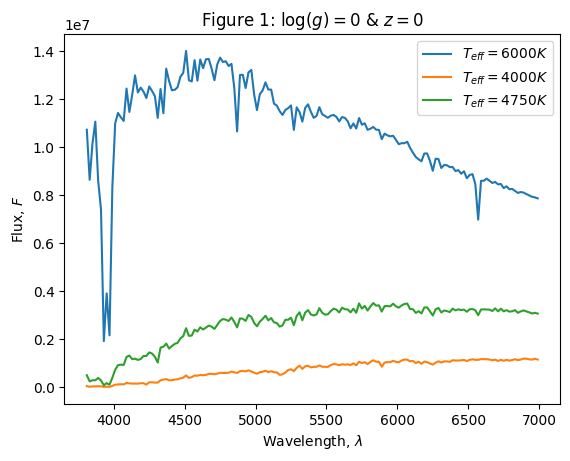

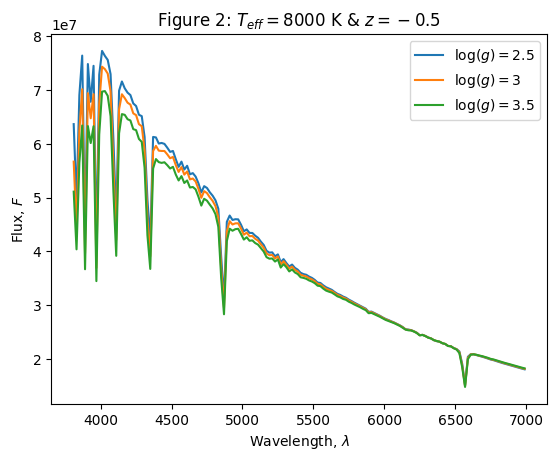

In [47]:
# initialize figure and both axes
fig1, axes1 = plt.subplots()
fig2, axes2 = plt.subplots()

# plot figure 1 and label axis and title
axes1.set_xlabel(CONFIG["plot configs"]["xlabel"])
axes1.set_ylabel(CONFIG["plot configs"]["ylabel"])
axes1.set_title(r"Figure 1: $\log(g)=0$ & $z=0$")
axes1.plot(*split_data(m1f1), label=r"$T_{eff}=6000{ K}$")
axes1.plot(*split_data(m1f2), label=r"$T_{eff}=4000{ K}$")
axes1.plot(*split_data(m1f3), label=r"$T_{eff}=4750{ K}$")
axes1.legend()

# plot figure 2 and label axis and title
axes2.set_xlabel(CONFIG["plot configs"]["xlabel"])
axes2.set_ylabel(CONFIG["plot configs"]["ylabel"])
axes2.set_title(r"Figure 2: $T_{eff}=8000$ K & $z=-0.5$")
axes2.plot(*split_data(m2f1), label=r"$\log(g)=2.5$")
axes2.plot(*split_data(m2f2), label=r"$\log(g)=3$")
axes2.plot(*split_data(m2f3), label=r"$\log(g)=3.5$")
axes2.legend()

# display figure
plt.show()

## Save Data to Drive

In [48]:
# save the figure to Google Drive
fig1.savefig(CONFIG.get("figure 1 save path"))
fig2.savefig(CONFIG.get("figure 2 save path"))

# Written Response Questions

<u>**Prompt**</u>:
> Provide a brief description of how the spectra change over this temperature range and why, based on what we have been discussing in class in terms of flux, opacity, optical depth, line broadening, etc.

<u>**My Response**</u>:
> From the first figure, we can see that the flux progressively rises as the temperature rises. On top of the flux rising, we have line broadening from the added temperatures. The optical depth also takes effect; the column density of the atmospheres is reduced, which thus redces the optical depth.